In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline 
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams

import warnings
import pickle
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 1000)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if x> 2 else '{:,.2f}'.format(x)
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_Seg_Metadata = pd.read_excel("./data/CustomerSegmentMetadata.xlsx")

### Table of Contents

* [Functions to Create All Visuals](#Visuals)
* [Exploratory, Data Preprocessing](#Exploratory)
* [Visuals - No Churn vs. Churn By Count](#VisByCount)
    * [Loyal vs. Churn Summary](#VisByCount)
    * [Loyal vs. Churn By Features](#VisByCount)
    * [Observations](#VisByCountObservations)
* [Visuals - No Churn vs. Churn By Monthly Revenue](#VisByMRevenue)
    * [Loyal vs. Churn Summary](#VisByRevSummary)
    * [Loyal vs. Churn By Features](#VisByRevByFeature)
    * [Observations](#VisByRevObservations)
* [Visuals - Additional Support Visuals](#VisRevenueByMisc)
    * [Loyal vs. Churn Against Continuous](#VisRevenueByMisc)
    * [Loyal vs. Churn Correlation Plots](#VisCorrelationByFeature)
    * [Observations](#VisByCorrelationObservations)
* [Conclusions](#Conclusions)    
* [Create Pickle Files For Modeling](#CreatePickle)    

# Functions To Create Visuals <a class="anchor" id="Visuals"></a>

In [3]:
# Graph 1 - Loyal vs. Churn Summary

def ShowChurnVsNoChurnSummary_Counts():
    '''Creates Two Summary Graphs, Uses Data Created in Exploratory Part of Notebook'''
    df_churnCounts = df_wD["Churn"].value_counts()
    df_churnpercents = df_wD["Churn"].value_counts(normalize=True)

    df_churnCounts = df_churnCounts.rename(index={0: 'Loyal', 1:'Churn'})
    df_churnpercents = df_churnpercents.rename(index={0: 'Loyal', 1:'Churn'})

    LoyalCnt = int(df_churnCounts[:2][0])
    ChurnCnt = int(df_churnCounts[:2][1])

    Loyalpercent = round(df_churnpercents[:2][0],2)
    Churnpercent = round(df_churnpercents[:2][1],2)

    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    sns.set(font_scale=2)
    sns.set_style("whitegrid")
    sns.barplot(x =df_churnCounts.index, y = df_churnCounts, ax=ax[0]);
    ax[0].annotate('{:.0f}'.format(ChurnCnt), (1,500));
    ax[0].annotate('{:.0f}'.format(LoyalCnt), (0,2900));
    ax[0].axes.xaxis.set_visible(True)
    ax[0].set_ylabel("Count", size=15)
    
    for tick in ax[0].axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    for tick in ax[0].axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    
    sns.barplot(x =df_churnCounts.index, y = df_churnCounts, ax=ax[1]);
    ax[1].annotate('{:.0f}%'.format(100* Churnpercent), (1,500));
    ax[1].annotate('{:.0f}%'.format(100* Loyalpercent), (0,2900));
    ax[1].axes.xaxis.set_visible(True)
    ax[1].axes.yaxis.set_visible(False)
    ax[1].set_ylabel("Percent", size=15, color="black")
    for tick in ax[1].axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    for tick in ax[1].axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    
    plt.suptitle('Loyal vs. Churn Counts', fontsize = 30)

    plt.tight_layout(pad=4.0)
    plt.show();
    
#Graph 2 Review Counts by features
def reviewCategoricalCounts ():
    '''Creates Count Plots of all Features within the Dataset, Takes Data from Frames Created In Exploratory Part of Notebook'''
    warnings.filterwarnings("ignore")
    fig, ax = plt.subplots(figsize=(13,50))

    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    total = float(len(cats_w_Churn))
    for index, column in enumerate(cats_w_Churn):
        if column != 'Churn':
            ax = plt.subplot(20, 3, index+1, facecolor="white")
            ax = sns.countplot(x=column, hue="Churn", data=cats_w_Churn)
            GraphTitle = df_Seg_Metadata[df_Seg_Metadata["group"]==column]["Title"].values[0]
            ax.set_title(GraphTitle, size=20)          
            
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.get_legend().set_visible(False)
            plt.xticks(rotation = 45)
            ax.axes.yaxis.set_visible(False)

            for tick in ax.axes.yaxis.get_major_ticks():
                tick.label.set_fontsize(25)
                
            for tick in ax.axes.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)

            for p in ax.patches:
                percentage = '{:.0f}%'.format(100 * p.get_height()/total)
                x = p.get_x() + p.get_width()
                y = p.get_height()
                ax.annotate(percentage, (x, y),ha='center', size=15)
    
    fig.tight_layout()
    plt.show();
#No Churn vs. Churn By Counts Above _____________________________________________________________________

#No Churn vs. Churn By Revenue Below _____________________________________________________________________


# Graphs 3 & 4 - Summary No Churn vs. Churn By Revenue
def showPercentSummary(CountofGroupsToBeGraphed,plot_df,suptitle):
    '''Creates Summary Graphs, Takes in # of graphs to be created, Supporting Data needed to plot, and the Title'''
    
    sns.set(rc={"font.style":"normal",
            "axes.facecolor":"white",
            "figure.facecolor":"white"})

    #Caluculate number of columns and rows for the sub plots
    if CountofGroupsToBeGraphed == 1:
        nRows = 1
        nCols = 1
        figsize=(5,5) 
    fig, axes = plt.subplots(nrows=nRows, ncols=nCols, figsize=figsize)
    fig.subplots_adjust(top=8)

    if CountofGroupsToBeGraphed == 1:
        i = axes
        g = plot_df
        ax = axes
        custom_stacked_Summary(g, ax)
        ax.legend().set_visible(True)
        L=plt.legend(loc=(.9,0.5), prop={'size':30})
        L.get_texts()[0].set_text('Loyal')
        L.get_texts()[1].set_text('Churn')
        plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') #legend 'list' fontsize
        ax.set_xticklabels([])

    fig.suptitle(suptitle, fontsize = 30, y=1.05)
    rotation='vertical'
    plt.tight_layout()
    plt.show()

# Graphs 3 & 4 - Called within the above showPercentSummary() function
def custom_stacked_Summary(cross_tab_df, ax):
    '''Supporting Function Called by showPercentSummary() to create plots, takes in data to be graphed and ax object'''

    plot_df = cross_tab_df
    p = plot_df.plot(kind="bar", stacked=False, ax = ax)
    p.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax.tick_params(labelrotation=0)
    ax.xaxis.label.set_visible(False)
    ax.set_xlabel('')
    
    rcParams['axes.titlepad'] = 20 
    
    for tick in ax.axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    
    for pa in ax.patches:
        percentage = '{:.0f}%'.format(100 * pa.get_height())
        x = pa.get_x() + pa.get_width()
        y = pa.get_height()
        ax.annotate(percentage, (x, y),ha='center',size=25)
        
    return p
    
def showPercentRevenueByFeature():
    '''Creates subplots, uses data created a few steps prior to calling this function '''
    g_dfs = df_all_Percents.groupby("group")
    sns.set(rc={"font.style":"normal",
            "axes.facecolor":"white",
            "figure.facecolor":"white"})

    fig, axes = plt.subplots(nrows=6, ncols=int(len(g_dfs)/7)+1, figsize=(15,15))
    fig.subplots_adjust(top=8)

    # BUILD PLOTS ACROSS LEVELS
    for ax, (i,g) in zip(axes.ravel(), sorted(g_dfs)):
        custom_stacked_barplotByFeature(i, g, ax)

    fig.suptitle('% Revenue By:', fontsize = 30, y=1.03)
    rotation='vertical'
    plt.tight_layout()
    plt.show()   

    
    
def custom_stacked_barplotByFeature(t, sub_df, ax):
    '''Supporting function, called by showPercentRevenueByFeature only, takes in data from calling function and ax object '''
    plot_df = pd.crosstab(index=sub_df["shortDesc"], columns=sub_df['Churn'], 
                           values=sub_df['MnthlyRev%'], aggfunc=sum)

    ttle = sub_df["Title"][0:1].to_list()[0]
    p = plot_df.plot(kind="bar", stacked=False, ax = ax, title=ttle)
    p.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax.tick_params(labelrotation=0)
    ax.xaxis.label.set_visible(False)
    ax.legend().set_visible(False)
    
    rcParams['axes.titlepad'] = 20 
    
    for tick in ax.axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    
    for pa in ax.patches:
        percentage = '{:.0f}%'.format(100 * pa.get_height())
        x = pa.get_x() + pa.get_width()
        y = pa.get_height()
        ax.annotate(percentage, (x, y),ha='center')
        
    return p

#No Churn vs. Churn By Revenue Ends _____________________________________________________________________

#No Churn vs. Churn By Continous _____________________________________________________________________  
    
def ShowChurnNoChurnByContinousFeatures ():
    '''Creates Box Plots of the Continous Features Contained within the Dataset, Data Created in Earlier Steps  '''
    #Get List of Categorical and Continueous features
    cont_features = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]
    cat_features = [col for col in df.columns if df[col].dtype in [np.object]]

#     # Show/ look at numerical columns by churn and non churn
    df_IQR = pd.DataFrame(columns=["25%","75%"])
    warnings.filterwarnings("ignore")

    df_review_featuresByChurnNotChurn = df[cont_features]
    df_review_featuresByChurnNotChurn["Churn"] = df["Churn"]
    plt.figure(figsize=(15,7), facecolor="white")
#     sns.set(font_scale=4)
    sns.set_style("whitegrid")


    df_review_featuresByChurnNotChurn['Churnstr'] = df_review_featuresByChurnNotChurn['Churn']
    df_review_featuresByChurnNotChurn['Churnstr'] = df_review_featuresByChurnNotChurn['Churnstr'].astype(str)
    df_review_featuresByChurnNotChurn['Churnstr'].replace(to_replace="1", value='Churn', inplace=True)
    df_review_featuresByChurnNotChurn['Churnstr'].replace(to_replace="0", value='Loyal', inplace=True)

    for index, column in enumerate(df_review_featuresByChurnNotChurn):

        if column != "Churnstr" and column != 'Churn':
            ax = plt.subplot(2, 3, index+1)
            medians = round(df_review_featuresByChurnNotChurn.groupby(['Churn'])[column].median(),0)
            Q1 = df_review_featuresByChurnNotChurn.groupby(['Churnstr'])[column].quantile(.25)
            Q3 = df_review_featuresByChurnNotChurn.groupby(['Churnstr'])[column].quantile(.75)
            ttl = pd.concat([Q1, Q3], axis=1)
            ttl.columns = ["25%","75%"]
            ttl.index = [f'{column} - {Q1.index[0]}', f'{column}- {Q1.index[1]}']
            ttl.reset_index(inplace=True)

            df_IQR = df_IQR.append(ttl)


            vertical_offset = df_review_featuresByChurnNotChurn[column].median() * 0.05
            box_plot = sns.boxplot(x="Churnstr", y=column, data=df_review_featuresByChurnNotChurn, ax=ax);
            ax.set_xlabel('')
            
            for tick in ax.axes.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)
                
            for tick in ax.axes.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
    
            for xtick in box_plot.get_xticks():
                medlabel = '{:.0f}'.format(medians[xtick])
                box_plot.text(xtick,medians[xtick] + vertical_offset,medlabel, horizontalalignment='center'
                              ,size='medium',color='w',weight='bold', bbox=dict(facecolor='#445A64'), ha='center', 
                              va='center')
                
             
    
    plt.subplots_adjust(top=0.2)

    plt.tight_layout(pad=4.0)
    plt.show();
    warnings.filterwarnings('default')

    from IPython.display import display, HTML
    display(HTML(df_IQR.to_html(index=False)))

#No Churn vs. Churn By Continous Ends _____________________________________________________________________

#No Churn vs. Churn Index Graphs _____________________________________________________________________  
    
def ShowChurnNoIndex():
    '''Creates Heatmaps, Uses Index, Churn vs. Non Churn Data Created in Earlier Steps  '''
    #Create Customer Profile for Churn vs non churn
    df_Chrn_Cust_T = df[df["Churn"] == 1].describe().T
    df_Nchrn_Cust_T = df[df["Churn"] == 0].describe().T

    df_wD_all_gpby = df_wD_all.groupby(['Churn']).agg('sum')
    df_wD_all_gpby = df_wD_all_gpby.reset_index().rename_axis(None, axis=1)
    df_wD_all_gpby_T = df_wD_all_gpby.T
    df_wD_all_gpby_T.columns = ['LoyalCust', 'ChurnCust']


    df_wD_all_gpby_T["Ttls"] = df_wD_all_gpby_T["LoyalCust"] + df_wD_all_gpby_T["ChurnCust"]
    df_wD_all_gpby_T["Loyal_I"] = df_wD_all_gpby_T["LoyalCust"]/df_wD_all_gpby_T["Ttls"]
    df_wD_all_gpby_T["Churn_I"] =  df_wD_all_gpby_T["ChurnCust"]/df_wD_all_gpby_T["Ttls"]
    LoyalIndex = df_wD_all_gpby_T.loc[ ['Cnt'] ,['Loyal_I'] ].values[0][0]
    ChurnIndex = df_wD_all_gpby_T.loc[ ['Cnt'] ,['Churn_I'] ].values[0][0]
    df_wD_all_gpby_T["Loyal"] = df_wD_all_gpby_T["Loyal_I"]/LoyalIndex
    df_wD_all_gpby_T["Churn"] =  df_wD_all_gpby_T["Churn_I"]/ChurnIndex

    df_wD_all_gpby_T = df_wD_all_gpby_T.drop(['Churn', 'Cnt'])
    df_wD_all_gpby_T.sort_values(by='Churn', ascending=True, inplace=True)


    df_Cust_Profile_heatmap = df_wD_all_gpby_T.drop(columns=['LoyalCust', 'ChurnCust', 'Ttls', 'Loyal_I', 'Churn_I'],
                                                    axis=1)

    colormap=sns.diverging_palette(220,10,as_cmap=True)
    therows = list(df_Cust_Profile_heatmap.index)
    thecols = list(df_Cust_Profile_heatmap.columns)

    fig, ax = plt.subplots(figsize=(30,7))
    im = ax.imshow(df_Cust_Profile_heatmap.T, cmap=colormap)

    colormap=sns.diverging_palette(220,10,as_cmap=True)

    fig.colorbar(im, orientation="horizontal", pad=0.5)

    ax = sns.heatmap(df_Cust_Profile_heatmap.T, linewidth=0.5, cmap=colormap, cbar=False,  annot=True, 
                     annot_kws={"size": 20,"style": "italic", "weight": "bold"},center=1)

    ax.set_yticks(np.arange(len(thecols)))
    ax.set_xticks(np.arange(len(therows)))
    ax.set_yticklabels(thecols,fontsize = 18)
    ax.set_xticklabels(therows, fontsize = 18)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    #ax.set_title("Index of Churn vs. No Churn vs. Average")
    plt.subplots_adjust(top=0.2)
    plt.suptitle('Feature Usage Index', fontsize = 50)
    plt.tight_layout(pad=4.0)
    plt.show()
    
def showCorrelationWithChurn():
    '''Creates Heatmap, Uses Data Created in Earlier Steps, plots Correlation Between Churn and Non Churn  '''
    # what features correlate with churn
    df_ChurnvsNoChurnCorrelation = df_wD_all.corr().filter(regex='Churn')
    df_ChurnvsNoChurnCorrelation = df_ChurnvsNoChurnCorrelation[df_ChurnvsNoChurnCorrelation["Churn"]<1]
    df_ChurnvsNoChurnCorrelation.sort_values(by="Churn", inplace=True)

    colormap=sns.diverging_palette(220,10,as_cmap=True)
    therows = list(df_ChurnvsNoChurnCorrelation.index)
    thecols = list(df_ChurnvsNoChurnCorrelation.columns)

    fig, ax = plt.subplots(figsize=(30,7))
    im = ax.imshow(df_ChurnvsNoChurnCorrelation.T, cmap=colormap)
    
    fig.colorbar(im, orientation="horizontal", pad=0.5)
    
    ax = sns.heatmap(df_ChurnvsNoChurnCorrelation.T, linewidth=0.5, cmap=colormap, cbar=False,  
                     annot=True, annot_kws={"size": 20,"style": "italic", "weight": "bold"})

    
    ax.set_yticks(np.arange(len(thecols)))
    ax.set_xticks(np.arange(len(therows)))
    ax.set_yticklabels(thecols)
    ax.set_xticklabels(therows, fontsize =25)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.subplots_adjust(top=0.2)
    ax.set_title("Features Correlated with Churn", fontsize = 60)
    fig.tight_layout()
    plt.show()


In [4]:
print(ShowChurnVsNoChurnSummary_Counts.__doc__)

Creates Two Summary Graphs, Uses Data Created in Exploratory Part of Notebook


# Exploratory Analysis, and Preprocessing Data <a class="anchor" id="Exploratory"></a>

#### Exploritory:

* Understand Data: Find/Remove/Replace Nulls/ Update Data Types, Rename Columns To Aid Comprehension
* Creating Dummy Variables for Categorical Data

##### Understand Data

In [5]:
#View Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# View Unique values and look to consolidate values and columns to reduce model complexity
for col in df:
    print(f' Column Name: {col}')
    print(f' Unique Values: {df[col].unique()}')

 Column Name: customerID
 Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
 Column Name: gender
 Unique Values: ['Female' 'Male']
 Column Name: SeniorCitizen
 Unique Values: [0 1]
 Column Name: Partner
 Unique Values: ['Yes' 'No']
 Column Name: Dependents
 Unique Values: ['No' 'Yes']
 Column Name: tenure
 Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 Column Name: PhoneService
 Unique Values: ['No' 'Yes']
 Column Name: MultipleLines
 Unique Values: ['No phone service' 'No' 'Yes']
 Column Name: InternetService
 Unique Values: ['DSL' 'Fiber optic' 'No']
 Column Name: OnlineSecurity
 Unique Values: ['No' 'Yes' 'No internet service']
 Column Name: OnlineBackup
 Unique Values: ['Yes' 'No' 'No internet service']
 Column Name: DeviceProtection
 Unique V

In [7]:
# Replace/ consolidate values, columns
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['SeniorCitizen'].replace(to_replace="1", value="Y", inplace=True)
df['SeniorCitizen'].replace(to_replace="0", value='N', inplace=True)
df['gender'].replace(to_replace="Female", value='F', inplace=True)
df['gender'].replace(to_replace="Male", value='M', inplace=True)

df['OnlineSecurity'].replace(to_replace="No internet service", value='N', inplace=True)

df['OnlineSecurity'].replace(to_replace="No internet service", value='N', inplace=True)
df['OnlineBackup'].replace(to_replace="No internet service", value='N', inplace=True)
df['DeviceProtection'].replace(to_replace="No internet service", value='N', inplace=True)
df['TechSupport'].replace(to_replace="No internet service", value='N', inplace=True)
df['StreamingTV'].replace(to_replace="No internet service", value='N', inplace=True)
df['StreamingMovies'].replace(to_replace="No internet service", value='N', inplace=True)
df['MultipleLines'].replace(to_replace="No phone service", value='N', inplace=True)
df['MultipleLines'].replace(to_replace="No", value='N', inplace=True)
df['MultipleLines'].replace(to_replace="Yes", value='Y', inplace=True)

df['Partner'].replace(to_replace="No", value='N', inplace=True)
df['Partner'].replace(to_replace="Yes", value='Y', inplace=True)
df['Dependents'].replace(to_replace="No", value='N', inplace=True)
df['Dependents'].replace(to_replace="Yes", value='Y', inplace=True)
df['PhoneService'].replace(to_replace="No", value='N', inplace=True)
df['PhoneService'].replace(to_replace="Yes", value='Y', inplace=True)
df['OnlineSecurity'].replace(to_replace="No", value='N', inplace=True)
df['OnlineSecurity'].replace(to_replace="Yes", value='Y', inplace=True)
df['OnlineBackup'].replace(to_replace="No", value='N', inplace=True)
df['OnlineBackup'].replace(to_replace="Yes", value='Y', inplace=True)
df['DeviceProtection'].replace(to_replace="No", value='N', inplace=True)
df['DeviceProtection'].replace(to_replace="Yes", value='Y', inplace=True)
df['TechSupport'].replace(to_replace="No", value='N', inplace=True)
df['TechSupport'].replace(to_replace="Yes", value='Y', inplace=True)
df['StreamingTV'].replace(to_replace="No", value='N', inplace=True)
df['StreamingTV'].replace(to_replace="Yes", value='Y', inplace=True)
df['StreamingMovies'].replace(to_replace="No", value='N', inplace=True)
df['StreamingMovies'].replace(to_replace="Yes", value='Y', inplace=True)
df['PaperlessBilling'].replace(to_replace="No", value='N', inplace=True)
df['PaperlessBilling'].replace(to_replace="Yes", value='Y', inplace=True)

df['Contract'].replace(to_replace="Month-to-month", value='M2M', inplace=True)
df['Contract'].replace(to_replace="One year", value='1Yr', inplace=True)
df['Contract'].replace(to_replace="Two year", value='2Yr', inplace=True)


df['InternetService'].replace(to_replace="Fiber optic", value='FO', inplace=True)
df.rename(columns={"InternetService":"IsrvcType"},inplace=True)
# columns={"A": "a", "B": "c"}
df['Isrvc'] = df['IsrvcType'].apply(lambda x:"Y" if ((x=="FO") or (x=="DSL")) else "N")

df['PaymentMethod'].replace(to_replace="Electronic check", value='Chk_E', inplace=True)
df['PaymentMethod'].replace(to_replace="Mailed check", value='Chk_M', inplace=True)
df['PaymentMethod'].replace(to_replace="Bank transfer (automatic)", value='BnkT', inplace=True)
df['PaymentMethod'].replace(to_replace="Credit card (automatic)", value='CC', inplace=True)



df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df = df.drop(['customerID'], axis=1)

#there are 11 rows missing values present in the dataset  in the TotalCharges features, droping
df = df.dropna()

In [8]:
# Rename columns to shorter names to ease viewing multiple columns and creating dummies with shorter names
df.rename(columns={'gender':'Sex','SeniorCitizen':'65p','Dependents':'Kids',
                   'PhoneService':'PhSrv','MultipleLines':'MLns', 
                                'OnlineSecurity':'OlSec','OnlineBackup':'OlB', 
                                'DeviceProtection':'DevcPrtc', 'TechSupport':'TS',
                                'StreamingTV':'StrTV', 'StreamingMovies':'StrMvs', 
                                'Contract':'Cntrct','PaperlessBilling':'PlB',
                                'PaymentMethod':'PyM', 'MonthlyCharges':'ChrgMnthly',
                                'TotalCharges':'ChrgTtls'}, inplace=True)

# Reorder, Grouping Mins, Calls, Charges
df = df[['Sex', '65p', 'Kids', 'Partner','PhSrv', 'MLns', 'Isrvc','IsrvcType', 'OlSec',
       'OlB', 'DevcPrtc', 'TS', 'StrTV', 'StrMvs', 'Cntrct', 'PlB', 'PyM',
       'tenure','ChrgMnthly', 'ChrgTtls', 'Churn']]

##### Create Dummies

In [9]:
# Create Bins for Tenure, Monthly Fees, LifeTime Charges
#Create Bins Based on tenure
tenureIQR25 = df.tenure.quantile(.25)
tenureIQR50 = df.tenure.quantile(.50)
tenureIQR75 = df.tenure.quantile(.75)
ChrgMnthlyIQR25 = round(df.ChrgMnthly.quantile(.25),0)
ChrgMnthlyIQR50 = round(df.ChrgMnthly.quantile(.50),0)
ChrgMnthlyIQR75 = round(df.ChrgMnthly.quantile(.75),0)
ChrgTtlsIQR25 = round(df.ChrgTtls.quantile(.25),0)
ChrgTtlsIQR50 = round(df.ChrgTtls.quantile(.50),0)
ChrgTtlsIQR75 = round(df.ChrgTtls.quantile(.75),0)

df["tenureSeg"] = df["tenure"].apply(lambda x: ">= " + "{:.0f}".format(tenureIQR75)+"M" if x >=tenureIQR75 
                                     else (">= "+"{:.0f}".format(tenureIQR50)+"M" if x >=tenureIQR50
                                           else(">= "+"{:.0f}".format(tenureIQR25)+"M" if x >=tenureIQR25
                                           else "<= "+"{:.0f}".format(tenureIQR25)+"M")))

df["ChrgMnthlySeg"] = df["ChrgMnthly"].apply(lambda x: ">= " + "${:.0f}".format(ChrgMnthlyIQR75)+"M" if x >=ChrgMnthlyIQR75 
                                     else (">= "+"${:.0f}".format(ChrgMnthlyIQR50)+"M" if x >=ChrgMnthlyIQR50
                                           else(">= "+"${:.0f}".format(ChrgMnthlyIQR25)+"M" if x >=ChrgMnthlyIQR25
                                           else "<= "+"${:.0f}".format(ChrgMnthlyIQR25)+"M")))

df["ChrgTtlsSeg"] = df["ChrgTtls"].apply(lambda x: ">= " + "${:.0f}".format(ChrgTtlsIQR75)+"M" if x >=ChrgTtlsIQR75 
                                     else (">= "+"${:.0f}".format(ChrgTtlsIQR50)+"M" if x >=ChrgTtlsIQR50
                                           else(">= "+"${:.0f}".format(ChrgTtlsIQR25)+"M" if x >=ChrgTtlsIQR25
                                           else "<= "+"${:.0f}".format(ChrgTtlsIQR25)+"M")))


In [10]:
# Create Internet or Not Column
df["ISrcv_Y_N"] = df["Isrvc"].apply(lambda x: 'Y' if ((x=="DSL") or (x=="FO")) else "N")

In [11]:
#Create number of services count column
ServiceCols = df[['ISrcv_Y_N','StrTV', 'TS', 'PhSrv', 'StrMvs', 'DevcPrtc', 'OlSec', 'OlB']]

df["servCnt"] = df.apply(lambda row: sum(row[0:8]=="Y") ,axis=1)
# df["%PlanPart"] = df["servCnt"]/len(['ISrcv_Y_N','StrTV', 'TS', 'PhSrv', 'StrMvs', 'DevcPrtc', 'OlSec', 'OlB'])
df.drop(columns="ISrcv_Y_N", inplace=True)


servCntIQR25 = df.servCnt.quantile(.25)
servCntIQR50 = df.servCnt.quantile(.50)
servCntIQR75 = df.servCnt.quantile(.75)

# Create Bins for analysis
df["ServCntSeg"] = df["servCnt"].apply(lambda x: ">= " + "{:.0f}".format(servCntIQR75)+"Srvc" if x >=servCntIQR75 
                                     else (">= "+"{:.0f}".format(servCntIQR50)+"Srvc" if x >=servCntIQR50
                                           else(">= "+"{:.0f}".format(servCntIQR25)+"Srvc" if x >=servCntIQR25
                                           else "<= "+"{:.0f}".format(servCntIQR25)+"Srvc")))

In [12]:
#Convert all the categorical variables into dummy variables, create two Df's one with, one without dropping
df_wD_all = pd.get_dummies(df)

df_wD = pd.get_dummies(df, drop_first=True, dtype=float)
df_wD.head()

df_wD_all.insert(0,'Cnt',1)

In [13]:
# Drop any rows with NAs as they are all Churn rows
warnings.filterwarnings('ignore')
df = df.dropna()
cat_features = [col for col in df.columns if df[col].dtype in [np.object]]
cats_w_Churn = df[cat_features]
cats_w_Churn["Churn"] = df["Churn"]

`Observation: Data clean and ready for graphing and further analysis`

# Visuals - No Churn vs. Churn By Count <a class="anchor" id="VisByCount"></a>

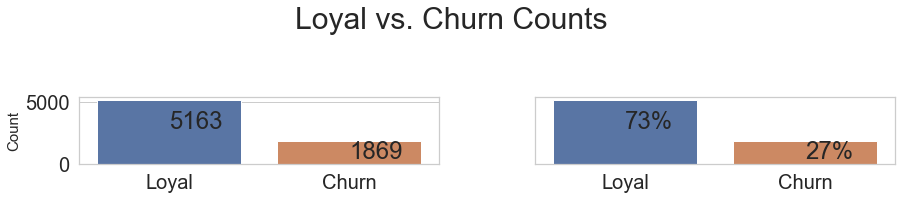

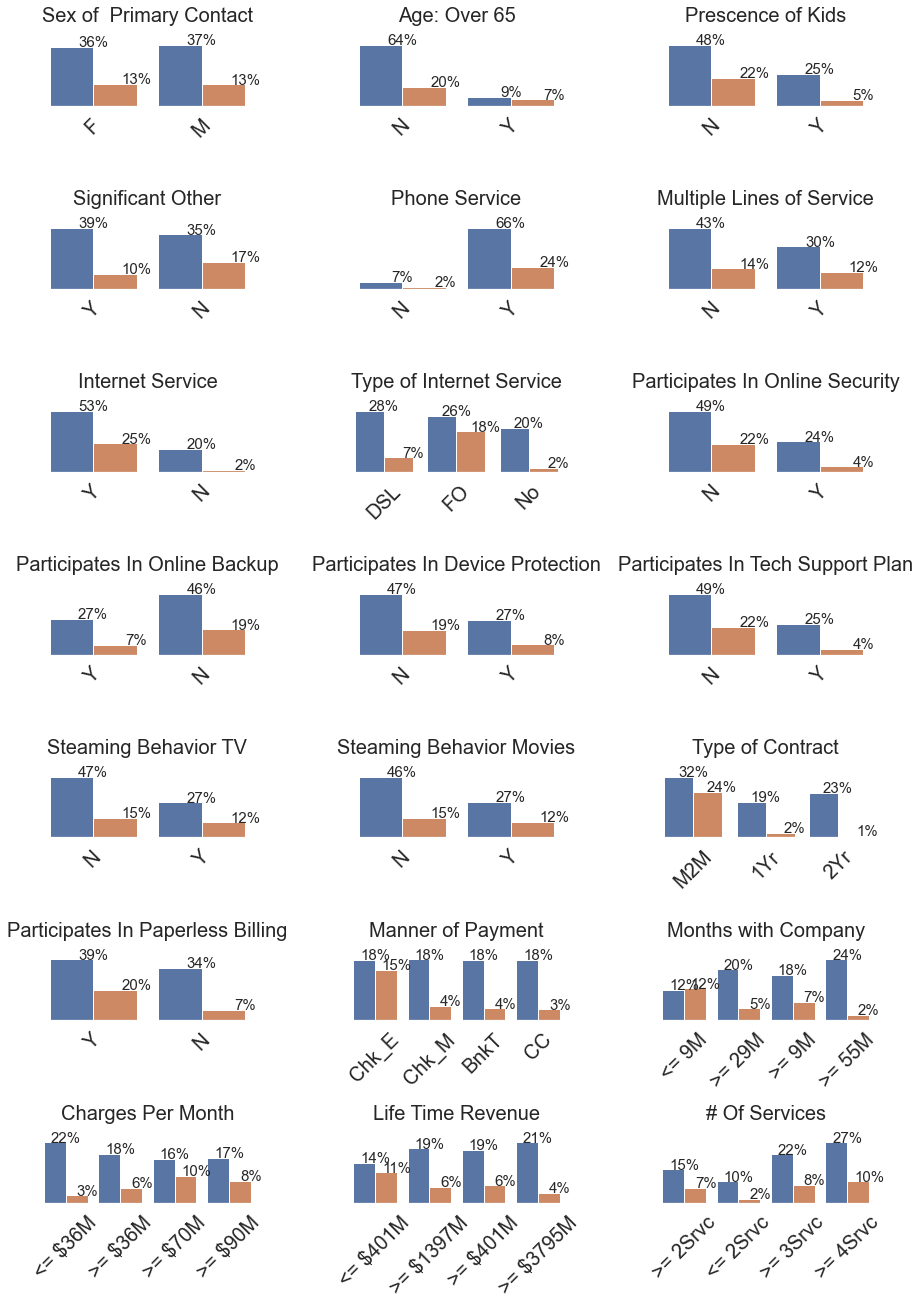

In [21]:
warnings.filterwarnings("ignore")
ShowChurnVsNoChurnSummary_Counts()
reviewCategoricalCounts()    

OBSERVATIONS: <a class="anchor" id="VisByCountObservations"></a>

Graphs - Loyal vs. Churn Summary: 
* `Dealing with imbalanced dataset, will employ "Weight" or SMOTE as neccessary.`

* Type Of Contract - `89% of Churners In Month-To-Month Contracts`
* Type of Internet Service - `66% Churners Part of Fiber Optics`
* Count of Services - `66% Churners Part of 3 or more Services`
* Monthly Charges - `66% of churners paying >= $70 per month, less churn with lower monthly spend`

# Visuals - No Churn vs. Churn By Monthly Revenue <a class="anchor" id="VisByMRevenue"></a>

### Create Additional Dataframes Needed to Graph Revenue Breakdown <a class="anchor" id="VisByMRevenue"></a>

In [15]:
# Create Dataframe to Graph Total Revenue Summary dataframe
df_Churn_Ttls = df_wD_all.pivot_table(index=['Churn'], values=["Cnt","ChrgMnthly"], aggfunc={"Cnt":'sum',"ChrgMnthly":'sum'}).sort_values(by="ChrgMnthly", ascending=False)
df_Churn_Ttls = df_Churn_Ttls.reset_index()
ttlMntlyCharges = df_Churn_Ttls.ChrgMnthly.sum()
ttlCnt = df_Churn_Ttls.Cnt.sum()
df_Churn_Ttls["ChrgMnthly%"] = df_Churn_Ttls["ChrgMnthly"]/ttlMntlyCharges
df_Churn_Ttls["ttlCnt%"] = df_Churn_Ttls["Cnt"]/ttlCnt
df_Churn_Ttls = df_Churn_Ttls.rename(index={0: 'Loyal', 1:'Churn'})
df_Churn_Ttls["group"] = "%Rev"
df_Churn_Ttls["Title"] = ""

# Create Dataframe to Graph Percent Customers by Loyal vs. Churn
s_churnpercents = df_wD["Churn"].value_counts(normalize=True)
df_churnpercents = pd.DataFrame(s_churnpercents) 
df_churnpercents["group"] = "%Customers"
df_churnpercents["Title"] = ""
df_churnpercents.rename(columns={"Churn":"%Customers"},inplace=True)
df_churnpercents["Churn"] = df_churnpercents.index

# Graph Percent Revnue by Loyal vs. Churn
CountofGroupsToBeGraphed = df_Churn_Ttls["group"].nunique()
plot_df = pd.crosstab(index=[df_Churn_Ttls['group'],df_Churn_Ttls['Title']], columns=df_Churn_Ttls['Churn'], 
                           values=df_Churn_Ttls['ChrgMnthly%'], aggfunc=sum)

### Create Additional Dataframse to Calculate % Revenue Monthly and Total By Features

In [16]:
cat_features = [col for col in df.columns if df[col].dtype in [np.object]]

# create dataframe for grouping continuous columns to create calucations of % revenue by Contiuous feature by churn
df_RevTenureByFeature = pd.DataFrame(columns=["Variable","tenure","ChrgMnthly","ChrgTtls","Churn"])

# add colummn name as a prefix for grouping
for i in cat_features:
    df1 = df.copy()
#     print(i)
    df1[i] = i +"_"+ df1[i]
    df1.rename(columns={i: "Variable"},inplace=True)
    df2 = df1.copy()
    df3 = df2[["Variable","tenure","ChrgMnthly","ChrgTtls","Churn"]]
    df_RevTenureByFeature = df_RevTenureByFeature.append(df3)
    
# Get position of "_" so I can remove extra string characters to facilitate comprehension
df_RevTenureByFeature['Indexof_'] = df_RevTenureByFeature["Variable"].str.find('_')

#--Using position to slice Variable using a lambda function
df_RevTenureByFeature['group'] = df_RevTenureByFeature.apply(lambda x: x['Variable'][0:x['Indexof_']],axis=1)
df_RevTenureByFeature['shortDesc'] = df_RevTenureByFeature.apply(lambda x: x['Variable'][x['Indexof_']+1:],axis=1)
df_RevTenureByFeature.drop(columns=["Indexof_"], inplace=True)

#Caluculate % Monthly Rev By Feature Group By Churn 
df_RevMonthlyByFeature_Percent = df_RevTenureByFeature.groupby(["Churn","Variable","group","shortDesc"])["ChrgMnthly"].sum()
df_RevMonthlyByFeature_Percent = df_RevMonthlyByFeature_Percent.reset_index(name='MnthlyRev')
df_RevMonthlyByFeature_Percent["MnthlyRev%"] = df_RevMonthlyByFeature_Percent.MnthlyRev.div(df.ChrgMnthly.sum(), axis=0)

df_RevTtlByFeature_Percent = df_RevTenureByFeature.groupby(["Churn","Variable","group","shortDesc"])["ChrgTtls"].sum()
df_RevTtlByFeature_Percent = df_RevTtlByFeature_Percent.reset_index(name='LftRev')
df_RevTtlByFeature_Percent["LftRev%"] = df_RevTtlByFeature_Percent.LftRev.div(df.ChrgTtls.sum(), axis=0)

# Bring % Mnthly Rev and % ttl Rev together
df_all_Percents = df_RevTtlByFeature_Percent.merge(df_RevMonthlyByFeature_Percent, on=["Variable","Churn","group","shortDesc"])
df_all_Percents = df_all_Percents.merge(df_Seg_Metadata,on=["group"])


### Call Graph Functions <a class="anchor" id="VisByRevSummary"></a>

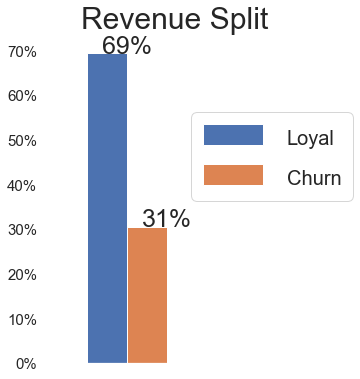

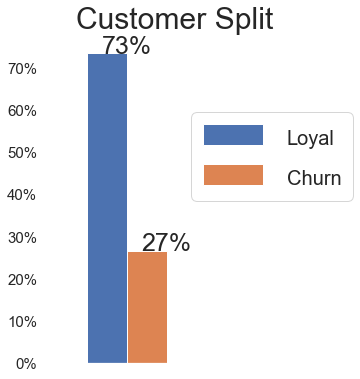

In [17]:
# Call graph function
warnings.filterwarnings("ignore")

suptitle = 'Revenue Split'
showPercentSummary(CountofGroupsToBeGraphed,plot_df,suptitle)

CountofGroupsToBeGraphed = df_churnpercents["group"].nunique()
plot_df1 = pd.crosstab(index=[df_churnpercents['group'],df_churnpercents['Title']], columns=df_churnpercents['Churn'], 
                           values=df_churnpercents['%Customers'], aggfunc=sum)
suptitle = 'Customer Split'
showPercentSummary(CountofGroupsToBeGraphed,plot_df1,suptitle)

Revenue Summary By Feature <a class="anchor" id="VisByRevByFeature"></a>

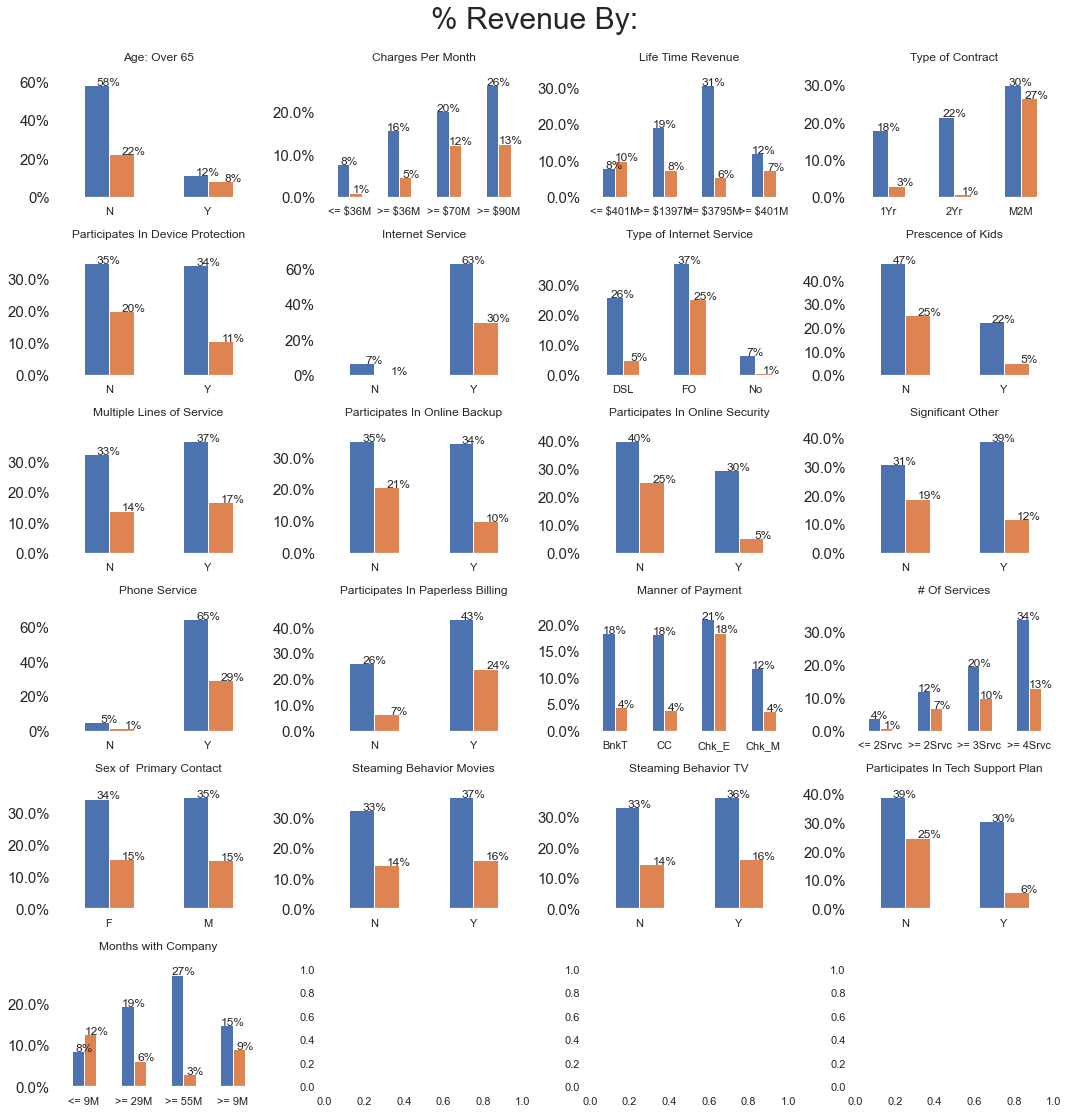

In [18]:
# Call graphs to view Montly Revenue by Feature
warnings.filterwarnings("ignore")
showPercentRevenueByFeature()

OBSERVATIONS: <a class="anchor" id="VisByRevObservations"></a>

Graphs - Loyal vs. Churn Summary: 

* `Building on Features Noted Above`

Graphs - Loyal vs. Churn Summary: 
* `Churners over index on spend, they make up 27% count, but account for 31% revenue`

* Type Of Contract - `27% of Revenue at risk with Month-To-Month Contracts`
* Type of Payment - `Majority of Churners Pay with Electronic Pay`
* Monthsly with Company - `Majority of Churners Part of 3 or more Services`
* Monthly Charges - `66% of churners paying >= $70 per month, less churn with lower monthly spend`

# Visuals - No Churn vs. Churn Misc <a class="anchor" id="VisRevenueByMisc"></a>

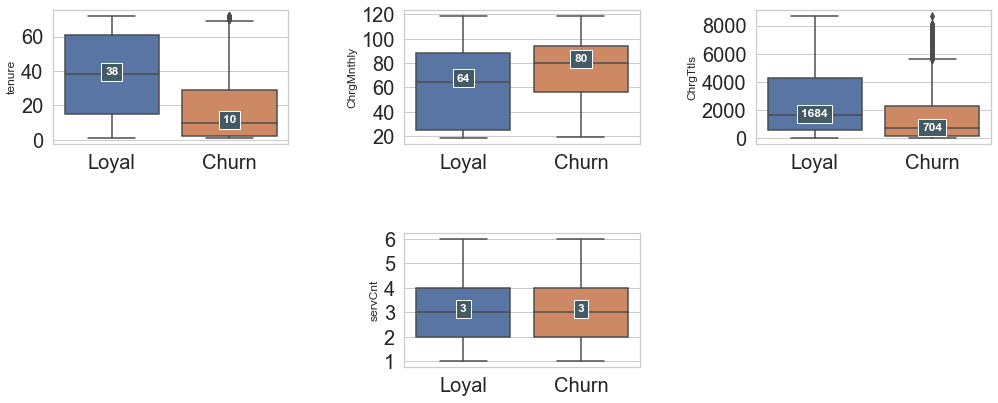

25%,75%,index
2.00,29,tenure - Churn
15,61,tenure- Loyal
56,94,ChrgMnthly - Churn
25,88,ChrgMnthly- Loyal
134,2331,ChrgTtls - Churn
578,4264,ChrgTtls- Loyal
2.00,4,servCnt - Churn
2.00,4,servCnt- Loyal


In [19]:
# Show Range of Countinous Features
ShowChurnNoChurnByContinousFeatures()

Churn Correlation By Feature <a class="anchor" id="VisCorrelationByFeature"></a>

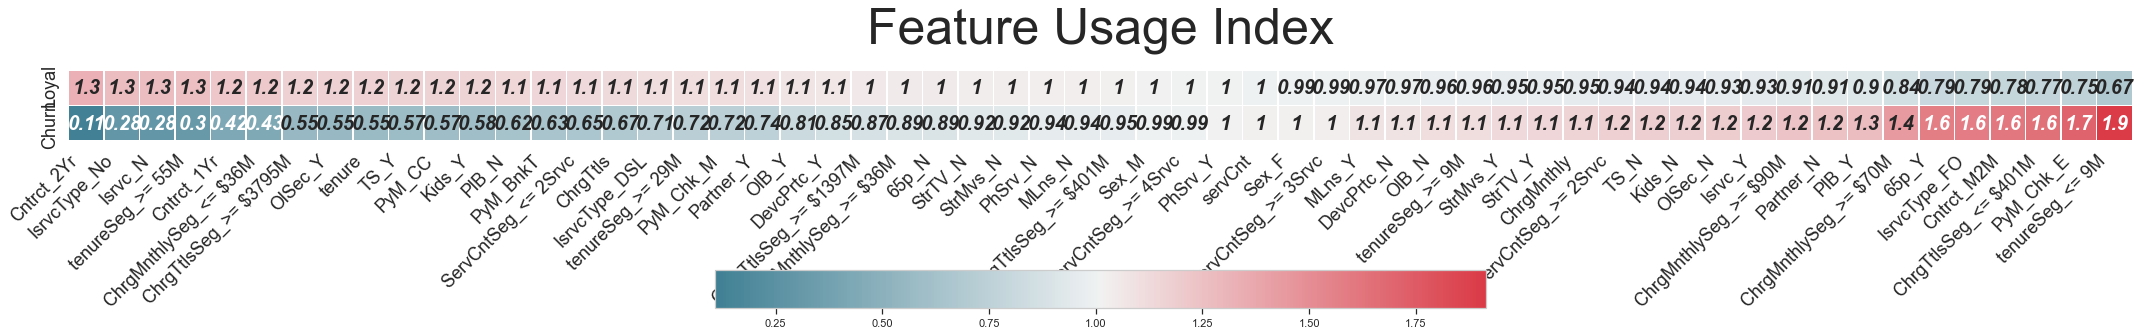

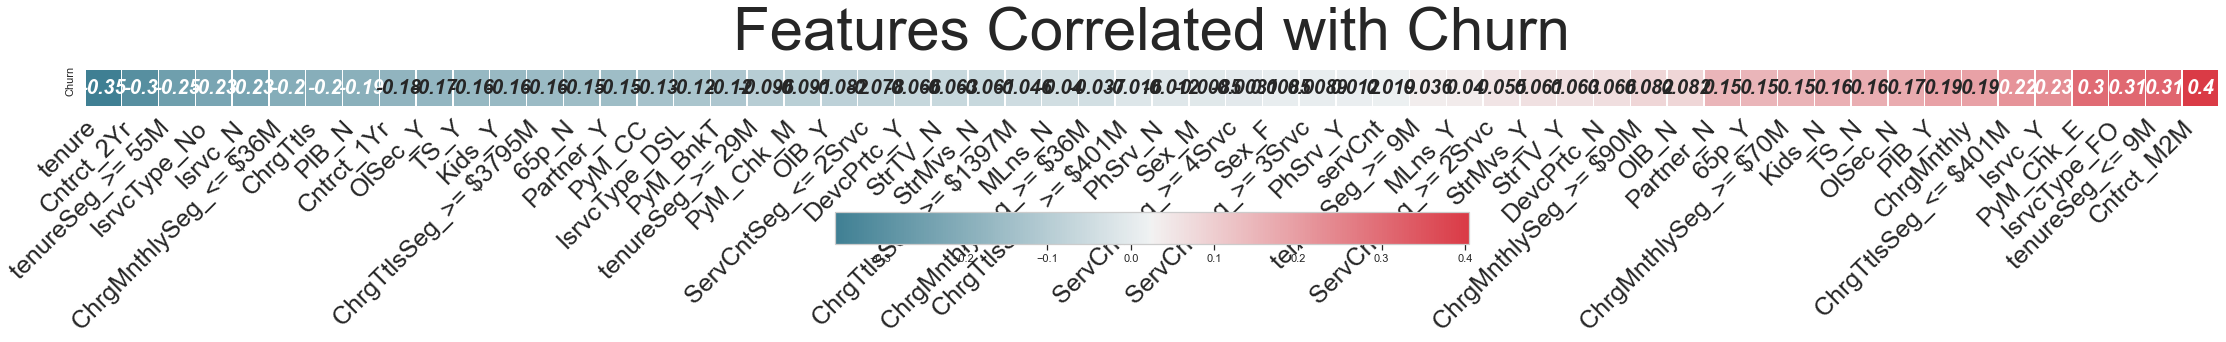

In [20]:
# Correlations between features and CHurn
ShowChurnNoIndex()
showCorrelationWithChurn()

OBSERVATIONS: <a class="anchor" id="VisByCorrelationObservations"></a>

Graphs - Loyal vs. Churn Summary: 

* Tenure - `75% of Churners leave between 2 - 29 months of usage, a few longer term customers also are showing churn.`
* Charges Monthly - `Churners seem to have a hire monthly spend and/or are charged more on a monthly bases vs Loyal customers.`
* Charges Totals - `charges obviously greater for Loyal customers vs. Churners.`

Feature Usage Index: 
* `Churners over index on Paying with Check Electronically, pay Month to Month vs. Contract, participate in Fiber Optics Internet Services, skew a little older than younger, and favor Paperless Billing.`
* `Loyal customers over index on Contract usage (1&2Yr), Not using Internet Services, and using Online Security.`

Features Correlated with Churn: 
* `Correlation figures support points shown in Index Heatmap.` 

# Conclusions <a class="anchor" id="Conclusions"></a>

CONCLUSIONS: 

* `Building on Features Noted Above`

Graphs - Loyal vs. Churn Summary: 
* `Churners over index on spend, they make up 27% count, but account for 31% revenue`

* Type Of Contract - `27% of Revenue at risk with Month-To-Month Contracts`
* Type of Payment - `Majority of Churners Pay with Electronic Pay`
* Monthsly with Company - `Majority of Churners Part of 3 or more Services`
* Monthly Charges - `66% of churners paying >= $70 per month, less churn with lower monthly spend`

Graphs - Loyal vs. Churn Summary: 
* `Dealing with imbalanced dataset, will employ "Weight" or SMOTE as neccessary.`

* Type Of Contract - `89% of Churners In Month-To-Month Contracts, 27% of Revenue at risk with Month-To-Month Contracts`
* Tenure - `75% of Churners leave between 2 - 29 months of usage, a few longer term customers also are showing churn.`
* Type of Internet Service - `66% Churners Part of Fiber Optics`
* Count of Services - `66% Churners Part of 3 or more Services`
* Monthly Charges - `66% of churners paying >= $70 per month, less churn with lower monthly spend`

Feature Usage Index: 
* `Churners over index on Paying with Check Electronically, paying Month to Month, participate in Fiber Optics Internet Services, skew a little older than younger, and favor Paperless Billing.`
* `Loyal customers over index on Contract usage (1&2Yr), Not using Internet Services, and using Online Security.`

# Create Pickle Files for Modeling <a class="anchor" id="CreatePickle"></a>


In [20]:
#Create Files for Modeling
with open('./data/df_wD_all.pickle', 'wb') as f:
    pickle.dump(df_wD_all, f)
    
with open('./data/df_wD.pickle', 'wb') as f:
    pickle.dump(df_wD, f)